# DCPP Homework
Author: Krishnan Chathadi_12420068

## Libraries

In [1]:
import numpy as np # Imports the numpy library
import pandas as pd # Imports the pandas library

np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals, suppresses scientific notation for small floating-point numbers.

# Plotting libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
import requests # Imports the Requests library to handle HTTP requests
from IPython.display import HTML # Imports the `HTML` function from `IPython.display` for rendering HTML content in Jupyter notebooks
from bs4 import BeautifulSoup # For web scraping

import time # Useful for setting delays
import datetime # For processing date

import re #Regular expressions for string manipulation

In [3]:
# Library for natural language processing, sentiment analysis
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk.sentiment import SentimentIntensityAnalyzer

## Functions

In [4]:
# Calculate current age based on date of birth (in datetime format)
def calc_age(dob):
    dob = pd.to_datetime(dob) # Convert the value to datetime format

    # Calculate the differences for year, month and day separately
    yeardiff = pd.Timestamp.now().year - dob.year  
    monthdiff = pd.Timestamp.now().month - dob.month
    daydiff = pd.Timestamp.now().day - dob.day

    # Set default value for age as yeardiff - 1.
    # This would be the age, if the birthday has not come up in the current year.
    age = yeardiff - 1

    # If birthday has already passed in the current year, then monthdiff will be greater than zero.
    # Or if monthdiff is zero and daydiff greater than zero.
    if monthdiff > 0:
        age = yeardiff
    elif monthdiff == 0:
        if daydiff >= 0:
            age = yeardiff

    return age

In [5]:
# Extract payment method
def extract_payment_method(text):
    val = str(text) # Convert to string
    endIdx = re.search('payment_method', val).end() + 1 # Find the string payment_method, capture the index
    result = val[endIdx:].split("'")[1].strip() # Use the index to slice the string, split by comma and get the result
    return result

In [6]:
# Extract employment title
def extract_emp_title(text):
    val = str(text)
    endIdx = re.search('title', val).end() + 1 # Find the string payment_method, capture the index
    result = val[endIdx:].split("'")[1].strip() # Use the index to slice the string, split by comma and get the result
    return result

In [7]:
# Calculate program duration as program duration + duration of capstone project
def calc_prog_duration(dur):
    dur_str = str(dur)
    dur_items = dur_str.split(' ')
    result = 0 # Set a default value
    
    # Loop through the items in the list and sum all the numbers
    for item in dur_items:
        if item.isdigit():
            result += int(item)
    
    return result

In [8]:
# Age of video in months
def calc_months(inp):
    age = str(inp.strip())

    # The age string contains a number followed by month(s), day(s) or year(s)
    # Assign the number to val. units would be month(s), day(s) or year(s). 
    val = int( age.split(' ')[0].strip() )
    units = age.split(' ')[1].strip()

    # If day(s), the age in months will be zero. If year(s), multiply the value by 12.
    if (units == 'day') or (units == 'days'):
        val = 0
    elif(units == 'year') or (units == 'years'):
        val = val * 12
    
    # val will be the age in months
    return val

## Question 1

### 1. Create a dataset of 5000 random users

In [9]:
# Generate data for 5000 random users
query_params = {'size' : 100, 'response_type':'json'} # To get 100 records at a time in JSON format.
df_random_users = pd.DataFrame() # Empty dataframe

for count in range(0,50):
    random_users_requests = requests.get('https://random-data-api.com/api/v2/users', params=query_params)
    
    # Check status code of request. 200 means that connection was successful
    if random_users_requests.status_code == 200:
        print('Loading DF', count)
        time.sleep(2)
        random_users_json = random_users_requests.json() # Get the data from the API in JSON format.
        temp_df = pd.DataFrame(random_users_json)
        df_random_users = pd.concat([temp_df, df_random_users], axis = 0, ignore_index=True) # ignore_index=True ensures proper row index

# Load the saved data
#df_random_users = pd.read_csv('Q1_RandomUsers.csv')

Loading DF 0
Loading DF 1
Loading DF 2
Loading DF 3
Loading DF 4
Loading DF 5
Loading DF 6
Loading DF 7
Loading DF 8
Loading DF 9
Loading DF 10
Loading DF 11
Loading DF 12
Loading DF 13
Loading DF 14
Loading DF 15
Loading DF 16
Loading DF 17
Loading DF 18
Loading DF 19
Loading DF 20
Loading DF 21
Loading DF 22
Loading DF 23
Loading DF 24
Loading DF 25
Loading DF 26
Loading DF 27
Loading DF 28
Loading DF 29
Loading DF 30
Loading DF 31
Loading DF 32
Loading DF 33
Loading DF 34
Loading DF 35
Loading DF 36
Loading DF 37
Loading DF 38
Loading DF 39
Loading DF 40
Loading DF 41
Loading DF 42
Loading DF 43
Loading DF 44
Loading DF 45
Loading DF 46
Loading DF 47
Loading DF 48
Loading DF 49


In [10]:
df_random_users # Check the data

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription
0,6289,f4c293fc-9f36-4f3a-b557-4cb91f6df94b,e79bMSRfys,Melvin,Predovic,melvin.predovic,melvin.predovic@email.com,https://robohash.org/dictaautautem.png?size=30...,Non-binary,+298 927.268.2453 x6281,529160673,1966-03-20,"{'title': 'Marketing Developer', 'key_skill': ...","{'city': 'Port Syble', 'street_name': 'Cleo Ce...",{'cc_number': '4173-6725-5343-8325'},"{'plan': 'Gold', 'status': 'Blocked', 'payment..."
1,5841,85a9be2c-03c8-4932-bef8-d60870efd297,Evp2b4UsNk,Alex,Dach,alex.dach,alex.dach@email.com,https://robohash.org/debitisperspiciatisexpedi...,Agender,+593 734.089.3213 x878,787188218,1960-07-23,"{'title': 'Dynamic Consulting Designer', 'key_...","{'city': 'East Tressaberg', 'street_name': 'Li...",{'cc_number': '5320-3674-0848-3613'},"{'plan': 'Gold', 'status': 'Active', 'payment_..."
2,1666,5243ec6b-ad02-4bc7-9122-49c6033df28d,ctxFUN67V1,Thalia,Hayes,thalia.hayes,thalia.hayes@email.com,https://robohash.org/nostrumvitaelibero.png?si...,Polygender,+234 1-754-257-0963 x64420,794076604,2004-01-14,"{'title': 'Customer Analyst', 'key_skill': 'Pr...","{'city': 'Port Palmer', 'street_name': 'Smith ...",{'cc_number': '5415-2952-3272-9818'},"{'plan': 'Professional', 'status': 'Pending', ..."
3,5099,48d02daf-9d89-477c-9317-5ef9af312f9b,JoRgsxU72W,Aubrey,Bradtke,aubrey.bradtke,aubrey.bradtke@email.com,https://robohash.org/sitaccusamusreiciendis.pn...,Genderqueer,+7-6 190-684-2932 x21032,635088362,1998-07-16,"{'title': 'Community-Services Representative',...","{'city': 'East Carylville', 'street_name': 'Eu...",{'cc_number': '5457-5691-5980-0714'},"{'plan': 'Starter', 'status': 'Blocked', 'paym..."
4,2905,37bda1c0-2cc9-494c-8de4-7c4b032fa4a7,ljVNITt9e6,Hung,Friesen,hung.friesen,hung.friesen@email.com,https://robohash.org/fugiatvoluptateconsequatu...,Bigender,+509 851.872.9101 x794,449942630,1979-02-19,"{'title': 'Healthcare Manager', 'key_skill': '...","{'city': 'Prosaccochester', 'street_name': 'Ea...",{'cc_number': '5496-2092-0911-2843'},"{'plan': 'Student', 'status': 'Pending', 'paym..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1711,9b5795bc-098b-48ec-a07c-30f0c59e329b,my2sAMbrpH,Antwan,Gleason,antwan.gleason,antwan.gleason@email.com,https://robohash.org/doloremquesaepeut.png?siz...,Agender,+41 933.462.1998 x6743,567245659,1978-01-20,"{'title': 'Investor Farming Director', 'key_sk...","{'city': 'New Sheilatown', 'street_name': 'Bea...",{'cc_number': '4474211845618'},"{'plan': 'Professional', 'status': 'Active', '..."
4996,1037,63078576-db24-4f42-b857-8695c5c28572,pJNSl894Qh,Pattie,Oberbrunner,pattie.oberbrunner,pattie.oberbrunner@email.com,https://robohash.org/facilisdeseruntet.png?siz...,Genderqueer,+596 835.917.8469 x4234,327089967,1967-05-05,"{'title': 'Human Advertising Executive', 'key_...","{'city': 'Port Omer', 'street_name': 'Angelo G...",{'cc_number': '6771-8982-2104-5801'},"{'plan': 'Professional', 'status': 'Active', '..."
4997,4244,38fea5ab-5924-45c3-8d5b-38a7b668901e,6rMk2TNOCh,Calvin,Bartoletti,calvin.bartoletti,calvin.bartoletti@email.com,https://robohash.org/voluptasquisunt.png?size=...,Agender,+1 698.679.8002 x3762,273608463,1962-11-15,"{'title': 'Education Coordinator', 'key_skill'...","{'city': 'Freddiemouth', 'street_name': 'Kilba...",{'cc_number': '5420-3722-6129-5558'},"{'plan': 'Premium', 'status': 'Blocked', 'paym..."
4998,5196,1efb3e3d-1496-416b-a796-c684310eee41,zPyWDUiOkA,Cruz,Bayer,cruz.bayer,cruz.bayer@email.com,https://robohash.org/quoquisquamut.png?size=30...,Non-binary,+249 673.446.4885 x3548,311434435,1988-11-08,"{'title': 'Corporate Officer', 'key_skill': 'N...","{'city': 'South Kirbymouth', 'street_name': 'C...",{'cc_number': '5116-2611-8681-3786'},"{'plan': 'Free Trial', 'status': 'Active', 'pa..."


In [11]:
df_random_users.info() # Check the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5000 non-null   int64 
 1   uid                      5000 non-null   object
 2   password                 5000 non-null   object
 3   first_name               5000 non-null   object
 4   last_name                5000 non-null   object
 5   username                 5000 non-null   object
 6   email                    5000 non-null   object
 7   avatar                   5000 non-null   object
 8   gender                   5000 non-null   object
 9   phone_number             5000 non-null   object
 10  social_insurance_number  5000 non-null   object
 11  date_of_birth            5000 non-null   object
 12  employment               5000 non-null   object
 13  address                  5000 non-null   object
 14  credit_card              5000 non-null  

### 2. Create a column for age - as of 27 Feb 2025

In [12]:
# Use the date_of_birth to calculate the age and store it in a new column called Age.
df_random_users['Age'] = df_random_users['date_of_birth'].transform(calc_age)

### 3. Create 5000 data points for age

In [13]:
# Sample 10 age values, calculate mean and create 5000 data points  
mean_age_List = [ np.mean(df_random_users['Age'].sample(n = 10)) for i in range(0,5000) ]

# Convert to np.array and check the first 10 values
mean_age_Array = np.array(mean_age_List)
mean_age_Array[0:10]

array([31.7, 37. , 37.9, 41.6, 41.6, 42.2, 38. , 36.6, 35.2, 47.4])

### 4. Create a histogram for the mean_age_Array

<Figure size 640x480 with 0 Axes>

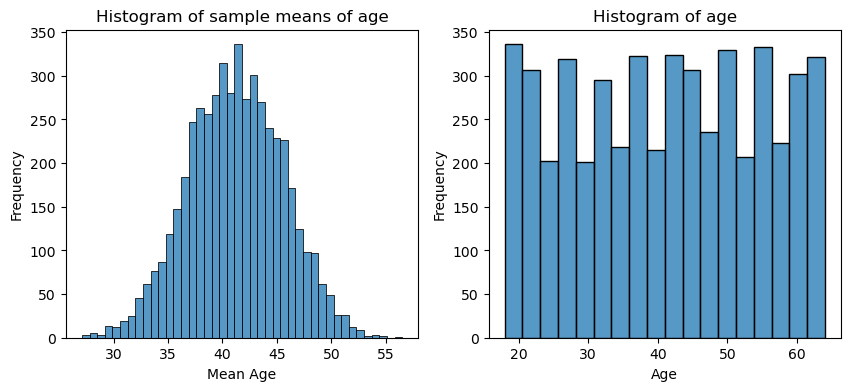

In [14]:
# Clear the old plot and create a figure with 1 row and 2 columns
plt.clf()
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Create the histograms
sns.histplot(mean_age_Array, edgecolor='black', ax=axes[0])
sns.histplot(df_random_users['Age'], edgecolor='black', ax=axes[1])

# Add title and labels
axes[0].set_title('Histogram of sample means of age')
axes[0].set_xlabel('Mean Age')
axes[0].set_ylabel('Frequency')

axes[1].set_title('Histogram of age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Show plot
plt.show()

**Observations**
* The histogram of the age sample means is close to a normal distribution.
* This is due to the effect of the **Central Limit Theorem**, which states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases.
* The distribution without sampling is shown on the right for comparison. 

### 5. Number of users for each payment method

In [15]:
# Extract the payment method from the subscription column and store it in a new column called Payment Method.
df_random_users['Payment Method'] = df_random_users['subscription'].transform(extract_payment_method)

In [16]:
# Number of users for each payment method
df_random_users['Payment Method'].value_counts()

Payment Method
Credit card       452
Apple Pay         448
Paypal            444
Google Pay        440
Visa checkout     430
Cash              426
Debit card        417
Alipay            408
Cheque            397
WeChat Pay        394
Bitcoins          377
Money transfer    367
Name: count, dtype: int64

**Observations**
* There are 12 different payment methods.
* All of the payment methods are equally popular among the users.

### 6. Unique employment titles

In [17]:
# Extract the title from employment column and store it in a new column called Employment title.
df_random_users['Employment Title'] = df_random_users['employment'].transform(extract_emp_title)

In [18]:
# Count the number of unique values in employment title
print('The number of unique employment titles is', df_random_users['Employment Title'].nunique())

The number of unique employment titles is 2794


* There are 2835 unique employment titles in this dataset.

## Question 2

### 1. Create a web scraper and extract the information

In [19]:
# Send a request to the url and check the status_code.
# status_code = 200 for successful connection.
url = 'https://www.isb.edu/en/study-isb/advanced-management-programmes.html'
isb_response = requests.get(url)
isb_response.status_code

200

In [20]:
# Create a beautiful soup object from the content of the webpage
isb_soup = BeautifulSoup(isb_response.content)
isb_soup

<!DOCTYPE HTML>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Advanced Management Programme</title>
<meta content="content-page" name="template"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/etc.clientlibs/acs-commons/clientlibs/vendor/fontawesome.min.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/isb/clientlibs/clientlib-base.min.css" rel="stylesheet" type="text/css"/>
<link href="https://www.isb.edu/en/study-isb/advanced-management-programmes.html" rel="canonical"/>
<meta http-equiv="content-type"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="Advanced Management Programme" name="title"/>
<!-- Google Site Verification Metatag -->
<meta content="kAXw9XfNqZAsLpAnAehCobmU9Zmrbff48W7p3xujlCA" name="google-site-verification"/>
<!-- Facebook Meta Tags -->
<meta content="4el5z47qtk9geskh0bm5oxjlshqu2a" name="facebook-domain-verification"/>
<meta content="Advanced Management Programme" property="og:

In [21]:
# Access the section containing the information related to the programmes
isb_prog_info = isb_soup.find_all('li', class_ = 'cmp-list__item')
isb_prog_info

[<li class="cmp-list__item">
 <div class="row card-4-container">
 <div class="col-md-12 col-sm-12">
 <div class="card-4">
 <figure>
 <img alt="imageAltText" class="img-responsive" loading="lazy" src="/content/dam/sites/isb/study-isb/advanced-management-programmes/AMP-AMPBA-Common-Thumbs.png"/>
 </figure>
 <div class="card-detail">
 <span class="award-icon"><img alt="award icon" loading="lazy" src="/content/dam/sites/isb/images/award-ic.png"/></span>
 <div class="head-bx">
 <div class="tag"></div>
 <h3>Advanced Management Programme in Business Analytics &amp; AI (AMPBA)</h3>
 <h4>Designed for professionals who want to build or enhance their understanding of data &amp; analytics to inform business decision-making</h4>
 </div>
 <div class="info-bx">
 <div class="row">
 <div class="col-md-6 col-xs-6 bor-botom">
                            Duration: <strong>12 months + 3 months of Capstone Project</strong>
 </div>
 <div class="col-md-6 col-xs-6 bor-botom">
                            Work E

In [22]:
len(isb_prog_info) # Check the length to ensure that we have all the required objects

5

* 5 different programmes can be seen on the webpage.
* The length of isb_prog_info is 5, which shows that all the data related to the programmes, were accessed.

In [23]:
# Extract programme titles
isb_prog_titles = [ title.find('h3').text for title in isb_prog_info ]
isb_prog_titles

['Advanced Management Programme in Business Analytics & AI (AMPBA)',
 'Advanced Management Programme for Healthcare (AMPH)',
 'Advanced Management Programme for Infrastructure (AMPI)',
 'Advanced Management Programme in Operations and Supply Chain (AMPOS)',
 'Advanced Management Programme in Public Policy (AMPPP)']

In [24]:
# Get the description for each title 
isb_prog_descriptions = [ desc.find('h4').text for desc in isb_prog_info ]
isb_prog_descriptions

['Designed for professionals who want to build or enhance their understanding of data & analytics to inform business decision-making',
 'Meant to deliver specialised management education to executives from the healthcare-delivery industry, and those who want to build domain expertise',
 'Specialised programme for professionals who want to build or enhance expertise in the multidisciplinary sector of infrastructure, with focus on emerging economies',
 "Designed to meet the increasing need for specialised executives working in manufacturing and operations, aligned with India's focus on these sectors",
 'Specialised programme for the needs of mid-career and senior-level professionals from the public and private sectors, aimed at refining their understanding of policy design and implementation']

In [25]:
# Duration and work experience are nested in a single section
dur_wex = [ val.find_all('div', class_="col-md-6 col-xs-6 bor-botom") for val in isb_prog_info ]
isb_prog_durations = [ dur[0].text.split(':')[1].strip() for dur in dur_wex ]
isb_prog_work_exps = [ wex[1].text.split(':')[1].strip() for wex in dur_wex ]

# Print duration and work experience
print(isb_prog_durations) 
print(isb_prog_work_exps)

['12 months + 3 months of Capstone Project', '12 months', '12 months', '12 months', '12 months']
['2+ years', '3+ years', '5+ years', '5+ years', '5+ years']


### 2. Create a dataframe to store the information

In [26]:
# Create a dataframe by supplying the values in a dictionary format
df_isb_prog = pd.DataFrame({
    'Title' : isb_prog_titles,
    'Description' : isb_prog_descriptions,
    'Duration_Capstone' : isb_prog_durations,
    'Work Experience' : isb_prog_work_exps
})

In [27]:
# Create a new column for Capstone project. Mention 'Yes' if Duration_Capstone contains the word 'Capstone'. 
capstone = lambda x: 'No' if x.find('Capstone') == -1 else 'Yes'
df_isb_prog['Capstone Project'] = df_isb_prog['Duration_Capstone'].transform(capstone)
df_isb_prog

,Title,Description,Duration_Capstone,Work Experience,Capstone Project
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years,Yes
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years,No
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years,No
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years,No
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years,No


In [28]:
# Compute the duration as duration of program + duration of capstone project
df_isb_prog['Duration_In_Months'] = df_isb_prog['Duration_Capstone'].transform(calc_prog_duration)
df_isb_prog

,Title,Description,Duration_Capstone,Work Experience,Capstone Project,Duration_In_Months
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,2+ years,Yes,15
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,3+ years,No,12
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,5+ years,No,12
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,5+ years,No,12
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,5+ years,No,12


## Question 3

### Article Text

#### Unifying AI and Data Analytics: The New Frontier in Business Decision Making

The next time Hotstar or Netflix recommends a binge-worthy series or Myntra and Amazon anticipate your shopping preferences, do not be surprised - they are simply harnessing the power of data and AI in real-time. Most of these new-age organisations, whether homegrown startups or global giants have mastered the art of data-driven personalisation by leveraging advanced algorithms to filter millions of data points.

**AI and Data Analytics: A Necessity, Not a Luxury**

The integration of AI and data analytics is no longer optional in our current business ecosystem; it is imperative for business survival. A report by McKinsey indicates that organisations that use data-driven decision-making are 23 times more likely to acquire new customers, six times likely to retain them and 19 times likely to be profitable. Another study by Deloitte reveals that organisations leveraging data analytics experience a 5-6% higher productivity rate than those that do not. These compelling statistics demonstrate the ability to process and analyse data, which enhances day-to-day operations and provides a long-term competitive advantage.

Enter Artificial Intelligence (AI) – the game-changer that has transformed the landscape of data analytics and redefined how organisations approach decision-making. A report by Kyndryl highlighted that over 77% of Indian startups and 86% of business leaders are investing in AI and advanced technologies, placing India at the forefront of global AI adoption. The reasons are clear; AI’s ability to analyse vast datasets in real-time helps organisations forecast and manage risks, anticipate market shifts and gauge customer sentiments and automate customer support – providing them with a crucial edge in a market where every second and every customer counts.

**The Shift from Intuition to Data-Driven Decision-Making**

What has driven this transition from intuition to data-driven decisions? Traditionally, most business leaders relied on their experience, intuition and limited data to make decisions. As agility and competitiveness became paramount, this approach was replaced with a targeted, comprehensive and real-time data analysis. Another crucial factor is decision velocity – the accuracy and speed with which decisions are made, which has emerged as a critical competitive differentiator.

Additionally, evolving customer expectations necessitate real-time insights to customise products and experiences with precision. E-commerce platforms leverage AI-driven analytics to optimise their supply chain and enhance customer experiences. By tracking customer behaviour, preferences, patterns and inventory levels, their AI algorithms anticipate future demand, adjusts inventory and ensures timely delivery. Over years, this has helped them boost its operational efficiency, perform strategic cost reduction, prevent breakdowns and offer an unparalleled shopping experience.

**What’s Next? Keeping Pace with Innovation Through Agility**

As AI, real-time analytics and data insights evolve, manual data processing will become less viable. The significance of these technologies will only expand across industries and business functions including marketing, finance or operations. These business functions will benefit from a host of opportunities, like customer behaviour prediction, personalised campaign plans, fraud monitoring, risk management, predictive maintenance, supply chain management and automation of administrative tasks.

The impact of AI and data analytics is particularly evident in EdTech, where personalised learning and predictive analytics play a crucial role. AI can be utilised to analyse industry trends, design dynamic curricula and create immersive learning experiences that bridge skill gaps and align with evolving job markets. Meanwhile, predictive analytics enables institutions to identify learning patterns, forecast career paths and enhance student engagement and satisfaction through automation.

A wide variety of industry-relevant Gen-AI and Machine Learning (ML) models like TensorFlow, Gemini, PyTorch, Open AI, Sora and Stable Diffusion are making AI adoption more seamless and effective for organisations. By integrating these technologies at the right time, businesses can process, evaluate and act on insights continuously—without overburdening teams or compromising outcomes. This is particularly crucial for organisations seeking to scale operations while overcoming resource constraints, inefficiencies and data management challenges.

These are not futuristic concepts; they are a part of our present business ecosystem. The need of the hour is for organisations to embrace modern AI-driven technologies to make decisions that are faster, smarter, and more accurate. Those that fail to do so risk falling behind and losing ground to competitors. Ultimately, the strategic adoption of AI and data analytics will serve as the cornerstone of business success and long-term growth.

### 1. Creation of word cloud for the article

In [29]:
# Import the file
with open('AI_Data_Analytics.txt', 'r', encoding='utf-8') as file:
    ai_analytics = file.read()

In [30]:
# Tokenize the text
ai_tokens = nltk.word_tokenize(ai_analytics)

# Keep only alphabetic tokens and convert all to lower
ai_tokens = [ word.lower() for word in ai_tokens if word.isalpha() ]

# Remove stop words
ai_tokens = [ word for word in ai_tokens if word not in stopwords.words('english') ]

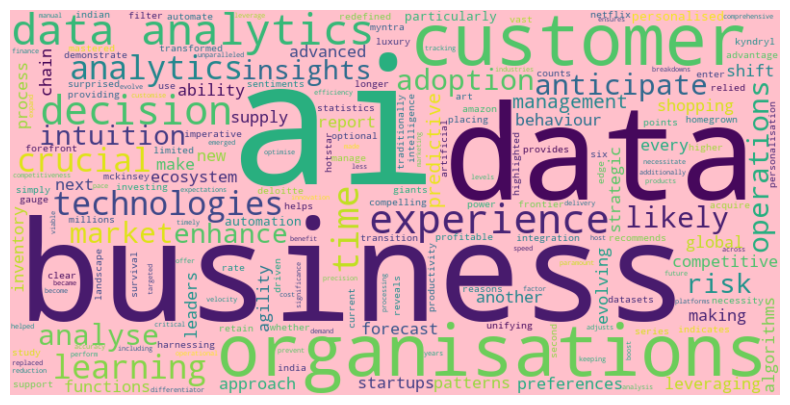

In [31]:
# Join tokens to recreate the text as a single string
cleaned_text_ai = ' '.join(ai_tokens)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='pink').generate(cleaned_text_ai)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

### 2. Analyze the prominent words from the Word Cloud 

In the WordCloud, the most frequently occurring words have the largest font size. Some of the prominent words are AI, business, data, organizations, data analytics. This is in line with the central theme of the article, which talks about the integration of data analytics and AI and how it impacts business and organisations.

At a slightly lower level, there are words like customer, decision, crucial, adoption, experience, time, analyse etc. This gives us a better understanding on what the organizations need to do (adoption, analyse, decision) and what factors they need to consider (customer, experience). Overall, the WordCloud has captured the gist of the article.

## Question 4

### 1. Parse the parquet file to create a dataframe with title, views and age of video

In [32]:
# Read the data from the parquet file and check it
df_isb_videos = pd.read_parquet('ISB_video_data.parquet')
df_isb_videos

,0
0,‘Educating women can solve most problems’: Pun...
1,"Microfinance still considered exploitative, bu..."
2,Accounting Research as Bayesian Inference to t...
3,Does Labor Composition Impact the Transmission...
4,Perilous and Unaccountable: The Positive Relat...
...,...
878,Michael Dell at ISB by Indian School of Busine...
879,Thomas Friedman on Globalisation 3.0 by Indian...
880,Professor John Mullins talking about Entrepren...
881,George Bush visit to ISB by Indian School of B...


In [33]:
# Give a better name to the column 
df_isb_videos = df_isb_videos.rename( columns = {0: 'Parquet_Input'} )

In [34]:
# Video title is the string before "by Indian School of Business". Find the index and slice the string
# rfind is used because the pattern at the end of the parquet_input is more structured.
sliceTitle = lambda x: x[ : x.rfind('by Indian School of Business') ].strip()
df_isb_videos['Title'] = df_isb_videos['Parquet_Input'].transform( sliceTitle )

In [35]:
# For views, extract the text between the last instance of 'Business' and last instance of 'views'
# Since rfind gives the start index of the word, increment it by the length of the word.
sliceViews = lambda x: x[ (x.rfind('Business') + len('Business') + 1) : x.rfind('views') ].strip()
df_isb_videos['Views'] = df_isb_videos['Parquet_Input'].transform(sliceViews)

In [36]:
# Remove commas from the numbers and convert Views column to an integer
df_isb_videos['Views'] = df_isb_videos['Views'].str.replace(',','')
df_isb_videos['Views'] = df_isb_videos['Views'].astype(int)

In [37]:
# To get the age of the video, we can extract the text between views and ago
sliceAge = lambda x: x[ (x.rfind('views') + len('views') + 1) : x.rfind('ago') ]
df_isb_videos['Video_Age_Text'] = df_isb_videos['Parquet_Input'].transform(sliceAge)

In [38]:
# Calculate the age in months and store it in Video_Age column
df_isb_videos['Video_Age'] = df_isb_videos['Video_Age_Text'].transform(calc_months)

In [39]:
# Check the data
df_isb_videos

,Parquet_Input,Title,Views,Video_Age_Text,Video_Age
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’: Pun...,72,1 day,0
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...",292,8 days,0
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,132,12 days,0
3,Does Labor Composition Impact the Transmission...,Does Labor Composition Impact the Transmission...,131,12 days,0
4,Perilous and Unaccountable: The Positive Relat...,Perilous and Unaccountable: The Positive Relat...,79,12 days,0
...,...,...,...,...,...
878,Michael Dell at ISB by Indian School of Busine...,Michael Dell at ISB,5851,15 years,180
879,Thomas Friedman on Globalisation 3.0 by Indian...,Thomas Friedman on Globalisation 3.0,27247,15 years,180
880,Professor John Mullins talking about Entrepren...,Professor John Mullins talking about Entrepren...,2559,15 years,180
881,George Bush visit to ISB by Indian School of B...,George Bush visit to ISB,11828,15 years,180


### 2. Plot between views and age of the video

In [40]:
# Check the data in the numeric columns
df_isb_videos.describe().T

,count,mean,std,min,25%,50%,75%,max
Views,883.0,4217.844847,17364.015195,35.0,320.5,757.0,2192.0,234931.0
Video_Age,883.0,60.865232,41.154884,0.0,36.0,48.0,84.0,180.0


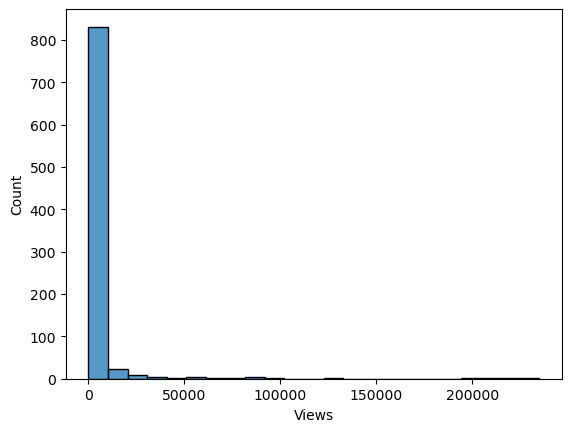

In [42]:
# Histogram of views
sns.histplot(data=df_isb_videos, x='Views', binwidth=10000)
plt.show()

* The distribution of views is heavily right-skewed.
* About 820 of the total of 883 videos have less than 10000 views.
* 75% of the videos have less than 2200 views!

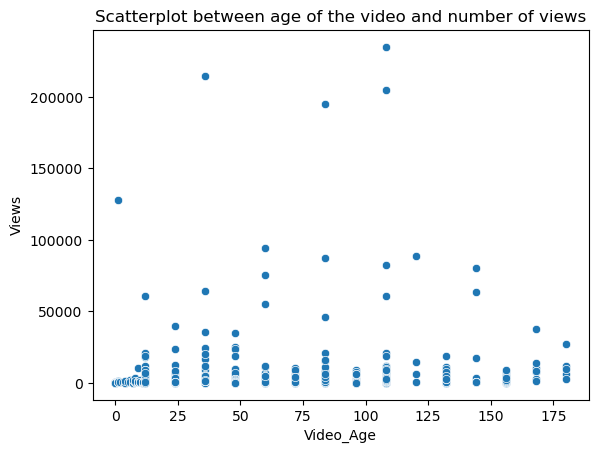

In [43]:
# Create a plot between views and age of video (in months) 
age_views_plot = sns.scatterplot(data = df_isb_videos, x = 'Video_Age', y = 'Views')
plt.title('Scatterplot between age of the video and number of views')
plt.show()

In [44]:
# Let us check the correlation value
corr_Age_Views = df_isb_videos['Video_Age'].corr( df_isb_videos['Views'] )
print('Correlation between views and age of the video is', corr_Age_Views)

Correlation between views and age of the video is 0.08944709261449806


**Observations**
* The scatterplot between the number of views and the age of the video does not show an trend.
* The correlation of around 0.089 confirms that the two columns do not have a linear correlation.
* The age in months is calculated as the (age in years) * 12. The age is not very accurate for videos more than a year old.  

### 3. Other question to be answered using the dataset

For a video posted on YouTube, the number of views is an important metric. It would be interesting to understand what factors contribute to a higher number of views. Is there an ideal duration for the video? This is the question I would like to answer, since the parquet file also contains information on the length of the videos.

In [45]:
# The portion of the parquet_input from the last instance of ago to the end of the string is the duration
sliceDuration = lambda x: x[ x.rfind('ago') + len('ago') + 1 : ]
df_isb_videos['Duration_Text'] = df_isb_videos['Parquet_Input'].transform(sliceDuration)
df_isb_videos.head()

,Parquet_Input,Title,Views,Video_Age_Text,Video_Age,Duration_Text
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’: Pun...,72,1 day,0,"12 minutes, 41 seconds"
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...",292,8 days,0,21 minutes
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,132,12 days,0,"5 minutes, 31 seconds"
3,Does Labor Composition Impact the Transmission...,Does Labor Composition Impact the Transmission...,131,12 days,0,"6 minutes, 6 seconds"
4,Perilous and Unaccountable: The Positive Relat...,Perilous and Unaccountable: The Positive Relat...,79,12 days,0,"3 minutes, 57 seconds"


In [46]:
# The duration text could be converted to seconds so that the correlation with views can be studied.
# Check the pattern in the duration_text field 
durationTextList = [ out.split(' ') for out in df_isb_videos['Duration_Text'] ]

In [47]:
# Check the distribution of elements after splitting.
maxLen = max( len(innerList) for innerList in durationTextList )
minLen = min( len(innerList) for innerList in durationTextList )
minLen, maxLen

(2, 4)

In [48]:
# It looks like splitting the Duration_Text created either 2 items or 4 items.
# Create a dataframe from the list
df_durationTextList = pd.DataFrame.from_records(durationTextList)
df_durationTextList

,0,1,2,3
0,12,"minutes,",41,seconds
1,21,minutes,None,None
2,5,"minutes,",31,seconds
3,6,"minutes,",6,seconds
4,3,"minutes,",57,seconds
...,...,...,...,...
878,1,"minute,",9,seconds
879,2,"minutes,",24,seconds
880,4,"minutes,",22,seconds
881,2,"minutes,",1,second


In [49]:
# Check the unique values in column 1
df_durationTextList[1].value_counts()

1
minutes,    462
minutes     166
minute,      99
hour,        93
seconds      50
hours,        7
hour          4
minute        2
Name: count, dtype: int64

In [50]:
# Check the unique values in column 3
df_durationTextList[3].value_counts()

3
seconds    545
minutes     98
second      16
minute       2
Name: count, dtype: int64

In [51]:
# In df_durationTextList, columns 1 and 3 have text values like minutes, seconds, hours. Columns 0 and 2 quantify them.
# To calculate the video length in seconds, second(s) will be replaced by 1, minute(s) by 60 and hour(s) by 3600 in columns 1 and 3.
# Then perform a simple arithmetic operation col[0] * col[1] + col[2]*col[3]
df_durationTextList[1] = df_durationTextList[1].apply( lambda x: 1 if str(x).startswith('sec') else x )
df_durationTextList[1] = df_durationTextList[1].apply( lambda x: 60 if str(x).startswith('min') else x )
df_durationTextList[1] = df_durationTextList[1].apply( lambda x: 3600 if str(x).startswith('hour') else x )
df_durationTextList[1].value_counts()

1
60      729
3600    104
1        50
Name: count, dtype: int64

In [52]:
df_durationTextList[3] = df_durationTextList[3].apply( lambda x: 1 if str(x).startswith('sec') else x )
df_durationTextList[3] = df_durationTextList[3].apply( lambda x: 60 if str(x).startswith('min') else x )
df_durationTextList[3] = df_durationTextList[3].apply( lambda x: 3600 if str(x).startswith('hour') else x )
df_durationTextList[3].value_counts()

3
1.0     561
60.0    100
Name: count, dtype: int64

In [53]:
# Replace null values by 0
df_durationTextList.fillna(0, inplace=True)

In [54]:
# Calculate the video duration in seconds
df_durationTextList[0] = df_durationTextList[0].astype(float)
df_durationTextList[2] = df_durationTextList[0].astype(float)
df_durationTextList['Video_Duration'] = df_durationTextList[0]*df_durationTextList[1] + df_durationTextList[2]*df_durationTextList[3]

In [55]:
# Check the video duration values
df_durationTextList['Video_Duration'].describe().T

count      883.000000
mean      1024.731597
std       1564.991646
min         19.000000
25%        122.000000
50%        366.000000
75%       1200.000000
max      25620.000000
Name: Video_Duration, dtype: float64

In [56]:
# Add the duration value to the original table
df_isb_videos['Video_Duration'] = df_durationTextList['Video_Duration']

In [57]:
# Create a categorical column for video duration 
length_bins = [0, 300, 600, 1200, 1800, 2700, 3600, float('inf')]
length_labels = ['0-5 mins', '5-10 mins', '10-20 mins', '20-30 mins', '30-45 mins', '45-60 mins', '>60 mins']
df_isb_videos['Video_Length'] = pd.cut(df_isb_videos['Video_Duration'], bins = length_bins, labels = length_labels, right = False)

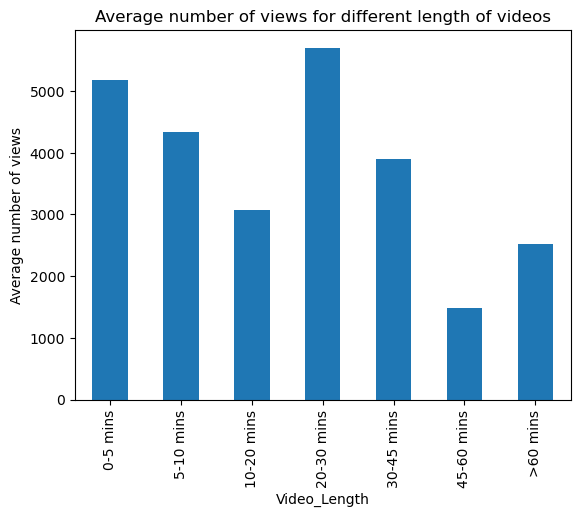

In [58]:
group_video_length_views = df_isb_videos.groupby('Video_Length', observed=False)['Views'].mean()

# Plot the bar chart
group_video_length_views.plot(kind='bar')
plt.ylabel('Average number of views')
plt.title('Average number of views for different length of videos')
plt.show()

**Observations**
* The average number of views is the maximum for videos which are 20-30 minutes long.
* This video length is ideal for providing a good insight on the topic.
* Videos less than 5 mins long, also have more views on an average.
* These videos would be good for announcements and brief summaries.

## Question 5

In [59]:
# Read the quotes sentiment parquet file
df_quotes = pd.read_parquet('quotes_sentiment_data.parquet')
df_quotes.head()

,quote,scores,sentiment
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2]
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]"
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]"
2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0]
19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]"


### 1. Rename the columns

In [60]:
# Scores column has values from NLTK VADER module and sentiment has values from stanza
df_quotes = df_quotes.rename( columns = { 'scores' : 'NLTK_VADER_Sentiment',
                                        'sentiment' : 'Stanza_Sentiment' } )

### 2. Extract the compound score from NLTK VADER

In [61]:
# Reset the index so that it is easier to access the rows
df_quotes.reset_index(inplace=True)
df_quotes.head()

,index,quote,NLTK_VADER_Sentiment,Stanza_Sentiment
0,11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2]
1,14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]"
2,604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]"
3,2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0]
4,19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]"


In [62]:
# Test if all NLTK_VADER_Sentiment has starts with compound.
# There are 1000 quotes. So there must be 1000 compound values in the column
comp_values = [ True if 'compound' in x else False for x in df_quotes['NLTK_VADER_Sentiment'] ]
len(comp_values)

1000

In [63]:
# Extract the compound score and store it in a new column
df_quotes['NLTK_VADER_Compound_Score'] = df_quotes['NLTK_VADER_Sentiment'].transform( lambda x: x['compound'] )

### 3. Calculate average value for stanza sentiment

In [64]:
# Calculate the mean stanza sentiment score and store it in a new column
df_quotes['Average_Stanza_Sentiment'] = df_quotes['Stanza_Sentiment'].transform( lambda x: np.mean(x) )

In [65]:
# Check the data
df_quotes

,index,quote,NLTK_VADER_Sentiment,Stanza_Sentiment,NLTK_VADER_Compound_Score,Average_Stanza_Sentiment
0,11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2],0.2263,2.0
1,14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]",-0.2500,1.0
2,604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]",0.9567,1.5
3,2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0],0.7304,0.0
4,19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]",0.0000,0.5
...,...,...,...,...,...,...
995,10374,Someday I must read this scholar Everyone. He ...,"{'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...","[1, 0]",-0.4767,0.5
996,14398,I count him braver who overcomes his desires t...,"{'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...",[1],0.0516,1.0
997,2928,"You can't make people change, but the organize...","{'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...",[1],0.5927,1.0
998,9416,He attacked everything in life with a mix of e...,"{'compound': -0.872, 'neg': 0.365, 'neu': 0.63...",[0],-0.8720,0.0


### 4. Scatter plot of NLTK_VADER_Compound_Score and Average_Stanza_Sentiment

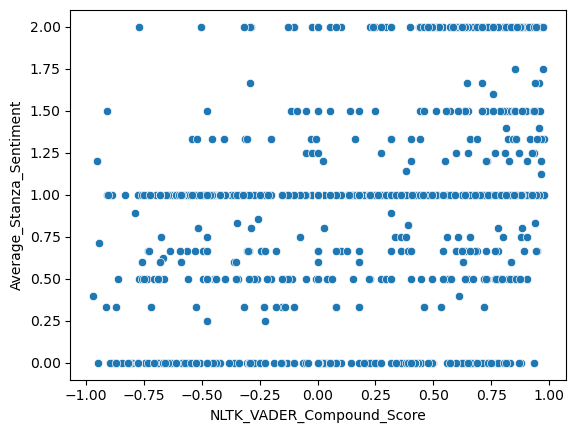

In [66]:
# Create a scatterplot
sns.scatterplot(data = df_quotes, x = 'NLTK_VADER_Compound_Score', y = 'Average_Stanza_Sentiment')
plt.show()

In [67]:
# Check the correlation value
corr_VADER_Stanza = df_quotes['NLTK_VADER_Compound_Score'].corr(df_quotes['Average_Stanza_Sentiment'])
corr_VADER_Stanza

0.37830114964984246

**Observations and Conclusions**
* NLTK VADER Compound score ranges from -1.0 to 1.0.
* Average stanza sentiment ranges from 0.0 to 2.0.
* To visualize the correlation, we draw 2 imaginary axes at y = 1.0 and x = 0.
* The lower left quadrant has more data points compared to the upper left quadrant. For negative sentiments, both values are low.
* However, for positive VADER Compound score, the average does not show a strong trend towards higher average stanza sentiment.
* A correlation value of 0.378 indicates a moderate linear correlation.

## Question 6

### 1. Sentiment analysis of the reviews

In [68]:
# Read csv into a dataframe
df_online_reviews = pd.read_csv('online_reviews.csv')

In [69]:
# Get a preview of the data
df_online_reviews.head()

,ProductId,Score,Text
0,B001E4KFG0,5,I have bought several of the Vitality canned d...
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,4,This is a confection that has been around a fe...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...


In [70]:
# Analyze the sentiment using SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df_online_reviews['Sentiment'] = df_online_reviews['Text'].apply(sia.polarity_scores)

In [71]:
# Fill the positive, neutral, negative and compound sentiment scores in 4 different columns
df_online_reviews['Positive_Sentiment'] = df_online_reviews['Sentiment'].transform( lambda x: x['pos'] )
df_online_reviews['Neutral_Sentiment'] = df_online_reviews['Sentiment'].transform( lambda x: x['neu'] )
df_online_reviews['Negative_Sentiment'] = df_online_reviews['Sentiment'].transform( lambda x: x['neg'] )
df_online_reviews['Compound_Sentiment'] = df_online_reviews['Sentiment'].transform( lambda x: x['compound'] )

In [72]:
# Check the data
df_online_reviews

,ProductId,Score,Text,Sentiment,Positive_Sentiment,Neutral_Sentiment,Negative_Sentiment,Compound_Sentiment
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp...",0.305,0.695,0.000,0.9441
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",0.000,0.862,0.138,-0.5664
2,B000LQOCH0,4,This is a confection that has been around a fe...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co...",0.155,0.754,0.091,0.8265
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.448,0.552,0.000,0.9468
...,...,...,...,...,...,...,...,...
2473,B002JX7GVM,1,"I've had Amy and Brians coconut water - yum!, ...","{'neg': 0.05, 'neu': 0.771, 'pos': 0.179, 'com...",0.179,0.771,0.050,0.9662
2474,B002JX7GVM,2,"I love coconut and pineapple, but I was not wi...","{'neg': 0.127, 'neu': 0.76, 'pos': 0.113, 'com...",0.113,0.760,0.127,-0.0429
2475,B002JX7GVM,4,...Then O.N.E. COCONUT WATER WITH A SPLASH OF ...,"{'neg': 0.02, 'neu': 0.893, 'pos': 0.087, 'com...",0.087,0.893,0.020,0.9514
2476,B002JX7GVM,4,This seems like a pretty straightforward drink...,"{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...",0.261,0.739,0.000,0.9710


### 2. Explore if the rating and compound sentiment score are correlated

In [73]:
# Check the correlation value
corr_score_comp = df_online_reviews['Compound_Sentiment'].corr(df_online_reviews['Score'])
print('Correlation between rating and compound sentiment is', corr_score_comp)

Correlation between rating and compound sentiment is 0.5222304373700569


The correlation between rating and compound sentiment is 0.52. This suggests a moderate correlation.

In [74]:
# Convert the score column to a categorical variable. 
df_online_reviews['Score'] = pd.Categorical(df_online_reviews['Score'])

In [75]:
# Create a Pandas group by object which can be aggregated as required.
grouped_by_score = df_online_reviews.groupby('Score', observed=False) 

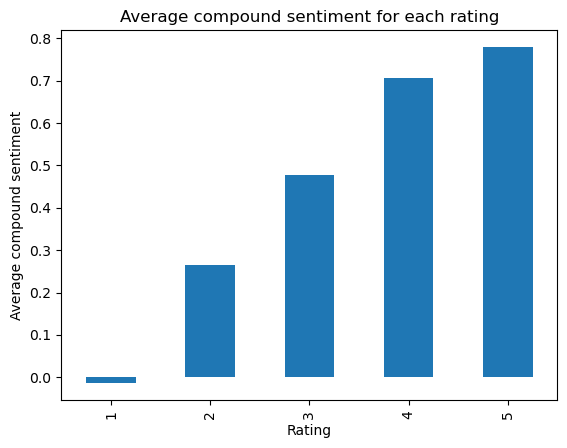

In [76]:
# Plot average compound sentiment for each rating
comp_sentiment_rating = grouped_by_score['Compound_Sentiment'].mean()
comp_sentiment_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average compound sentiment')
plt.title('Average compound sentiment for each rating')
plt.show()

**Observations**
* Higher average compound sentiment is observed for a higher rating.
* Users have conveyed their positive sentiments both through text and rating.   

### 3. Plot positive, negative and neutral sentiments for different ratings

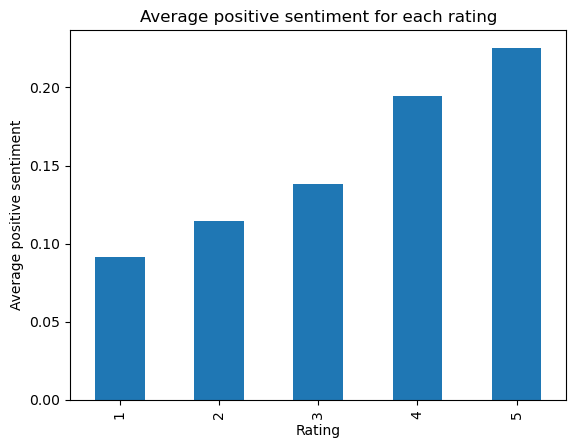

In [77]:
# Plot average positive sentiment for each rating
pos_sentiment_rating = grouped_by_score['Positive_Sentiment'].mean()
pos_sentiment_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average positive sentiment')
plt.title('Average positive sentiment for each rating')
plt.show()

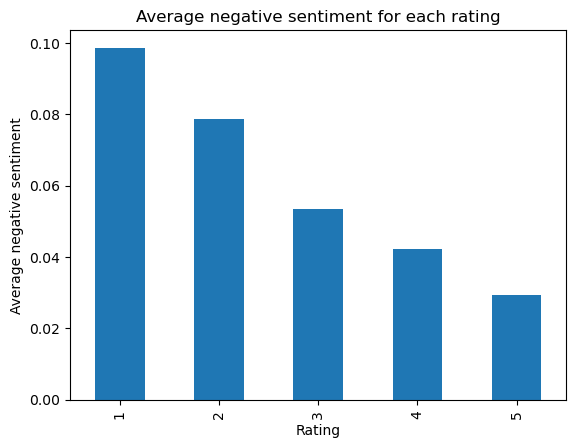

In [78]:
# Plot average negative sentiment for each rating
neg_sentiment_rating = grouped_by_score['Negative_Sentiment'].mean()
neg_sentiment_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average negative sentiment')
plt.title('Average negative sentiment for each rating')
plt.show()

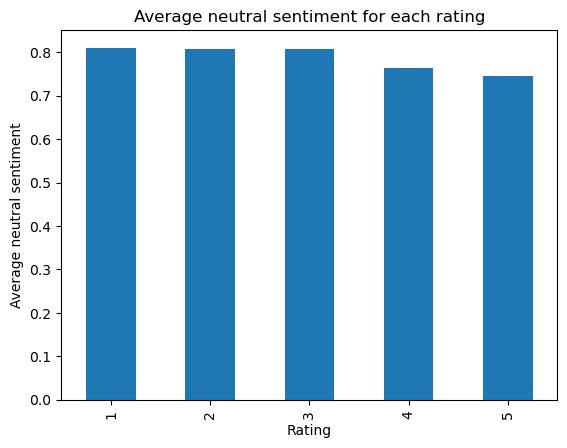

In [79]:
# Plot average neutral sentiment for each rating
neu_sentiment_rating = grouped_by_score['Neutral_Sentiment'].mean()
neu_sentiment_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average neutral sentiment')
plt.title('Average neutral sentiment for each rating')
plt.show()

**Observations**
* Higher average positive sentiment is associated with higher rating. Users reinforce their ratings with positive sentiments in comments.
* Higher average negative sentiment is associated with lower rating. Here also, the sentiments and the ratings are in line with each other.
* The average neutral sentiment is roughly the same for all ratings. Since facts and descriptions would have a neutral sentiment, it is not surprising that it is spread evenly across all ratings.

## Question 7

### 1. Create a dataframe with the data

In [80]:
# Read the csv file
df_office_iot_full = pd.read_csv('office_iot.csv')

In [81]:
# Preview the data
df_office_iot_full

,date,Temperature,Humidity,Light,CO2,Occupancy
0,2/2/2015 14:19,23.7000,26.2720,585.200000,749.200000,1
1,2/2/2015 14:19,23.7180,26.2900,578.400000,760.400000,1
2,2/2/2015 14:21,23.7300,26.2300,572.666667,769.666667,1
3,2/2/2015 14:22,23.7225,26.1250,493.750000,774.750000,1
4,2/2/2015 14:23,23.7540,26.2000,488.600000,779.000000,1
...,...,...,...,...,...,...
20555,2/18/2015 9:15,20.8150,27.7175,429.750000,1505.250000,1
20556,2/18/2015 9:16,20.8650,27.7450,423.500000,1514.500000,1
20557,2/18/2015 9:16,20.8900,27.7450,423.500000,1521.500000,1
20558,2/18/2015 9:17,20.8900,28.0225,418.750000,1632.000000,1


In [82]:
# Check the information on columns
df_office_iot_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         20560 non-null  object 
 1   Temperature  20560 non-null  float64
 2   Humidity     20560 non-null  float64
 3   Light        20560 non-null  float64
 4   CO2          20560 non-null  float64
 5   Occupancy    20560 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 963.9+ KB


In [83]:
# Convert the date to pandas datetime format so that Feb 5 data can be filtered out easily
df_office_iot_full['date'] = pd.to_datetime(df_office_iot_full['date'])

In [84]:
# Create a dataframe with only the values from Feb 5, 2015
df_office_iot = df_office_iot_full[ (df_office_iot_full['date'] >= pd.to_datetime('2015-02-05')) & (df_office_iot_full['date'] < pd.to_datetime('2015-02-06')) ]

In [85]:
# Reset the index
df_office_iot.reset_index(inplace=True, drop=True)

In [86]:
# Dataframe with values from Feb 5, 2015
df_office_iot

,date,Temperature,Humidity,Light,CO2,Occupancy
0,2015-02-05 00:00:00,21.2450,25.2450,0.0,456.500000,0
1,2015-02-05 00:01:00,21.2450,25.2450,0.0,458.500000,0
2,2015-02-05 00:02:00,21.2600,25.2600,0.0,459.666667,0
3,2015-02-05 00:03:00,21.2450,25.2450,0.0,464.000000,0
4,2015-02-05 00:04:00,21.2450,25.2000,0.0,465.000000,0
...,...,...,...,...,...,...
1435,2015-02-05 23:55:00,20.2900,21.2900,0.0,439.500000,0
1436,2015-02-05 23:55:00,20.2225,21.2225,0.0,445.000000,0
1437,2015-02-05 23:57:00,20.2000,21.2000,0.0,442.500000,0
1438,2015-02-05 23:57:00,20.2000,21.2000,0.0,443.500000,0


### 2. Bar plot for average temperature when the room is occupied and when the room is not occupied.

In [87]:
# Check for distinct occupancy values
df_office_iot['Occupancy'].value_counts()

Occupancy
0    901
1    539
Name: count, dtype: int64

* Occupancy is an int64 column, but it just takes two values - 0 or 1.
* Zero signifies that the room is not occupied.
* A value of one indicates that the room is occupied.

In [88]:
# Create a grouped by object for easier post processing
grouped_by_occupancy = df_office_iot.groupby('Occupancy', observed=False)

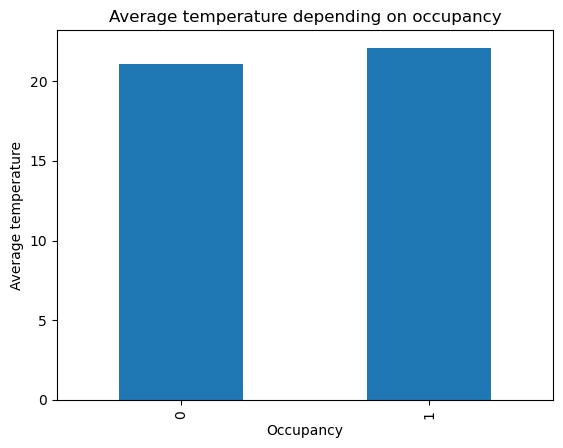

In [89]:
# Calculate mean temperature
temp_occupancy = grouped_by_occupancy['Temperature'].mean()

# Plot the bar chart
temp_occupancy.plot(kind='bar')
plt.ylabel('Average temperature')
plt.title('Average temperature depending on occupancy')
plt.show()

**Observations**
* Average temperature in the room is greater when the room is occupied.
* Human body generates heat. This difference in temperature can be explained scientifically.

### 3. Bar plot for average humidity when the room is occupied and when the room is not occupied.

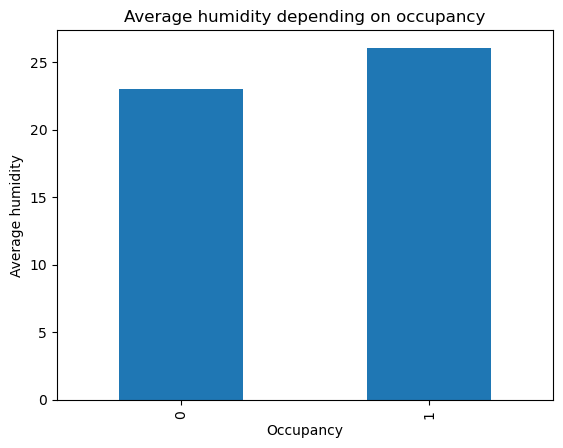

In [90]:
# Calculate mean humidity
humid_occupancy = grouped_by_occupancy['Humidity'].mean()

# Plot the bar chart
humid_occupancy.plot(kind='bar')
plt.ylabel('Average humidity')
plt.title('Average humidity depending on occupancy')
plt.show()

**Observations**
* The average humidity is higher when the room is occupied.
* This could be due to sweating. 

### 4. Bar plot for average light when the room is occupied and when the room is not occupied.

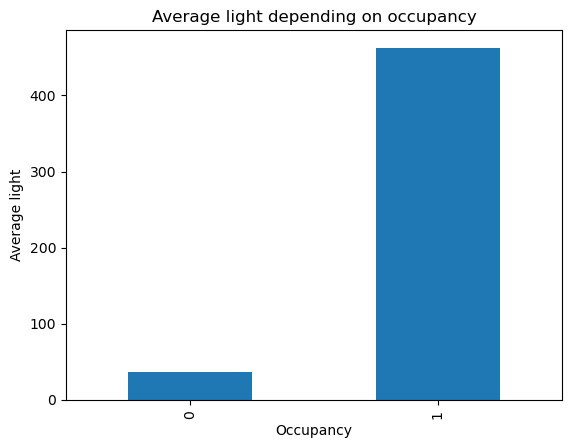

In [91]:
# Calculate mean light
light_occupancy = grouped_by_occupancy['Light'].mean()

# Plot the bar chart
light_occupancy.plot(kind='bar')
plt.ylabel('Average light')
plt.title('Average light depending on occupancy')
plt.show()

**Observations**
* The average light in the room is much higher when the room is occupied.
* Whenever the room is occupied, the lights are turned on. 

### 5. Bar plot for average CO2 when the room is occupied and when the room is not occupied.

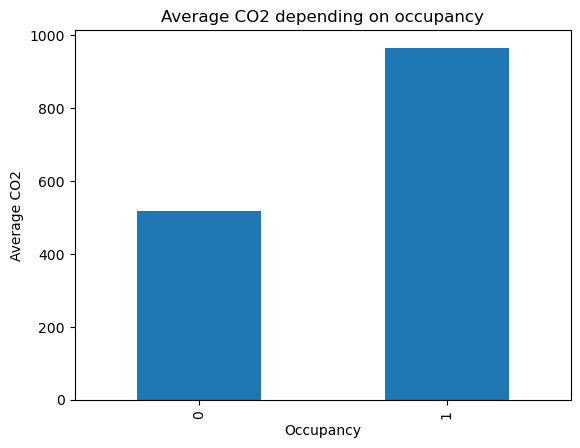

In [92]:
# Calculate mean CO2
CO2_occupancy = grouped_by_occupancy['CO2'].mean()

# Plot the bar chart
CO2_occupancy.plot(kind='bar')
plt.ylabel('Average CO2')
plt.title('Average CO2 depending on occupancy')
plt.show()

**Observations**
* The average CO2 in the room is higher when the room is occupied.
* This is explained scientifically since humans breathe out CO2.